### 1. Web scraping 
   * Website data is written in __HTML (HyperText Markup Language)__ which uses tags to structure the page
       * structure: \<tag>content\</tag>
   * Using a Python parser called __Beautiful Soup__
   * Accessing the HTML
       1. Manual Access: saving the HTML file to your computer manually
       2. Programmatic Access: 
           * Downloading HTML file programmatically
           ```python
              import requests
                  response = requests.get(url)
              # Save HTML to file 
              with open("saved_file_name", mode='wb') as file:
                   file.write(response.content)
           ```
           * Working with the response content live in your computer's memory using the BeautifulSoup HTML parser
           ```Python
              # Work with HTML in memory
               from bs4 import BeautifulSoup
               soup = BeautifulSoup(response.content, 'lxml')
            or soup = BeautifulSoup(file_path, 'lxml')
           ```


* BeautifulSoup
   * make soup (as shown above)
   * use methods in the Beautiful Soup library
      * soup.find()
   ```python
    soup.find('title')
   <title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>
   ```
      * __.contents__ to return a list of the tag's children. Because there's only one item with the title tag, the list is one item long so we can access it using the index 0:
    ```python
    soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]  
    'The Extra-Terrestrial\xa0(1982)'
    ```

In [146]:
url = 'https://www.rottentomatoes.com/m/black_panther_2018'
import requests
response = requests.get(url)

In [147]:
with open('test.html', mode = 'wb') as file:
    file.write(response.content)

In [148]:
from bs4 import BeautifulSoup
import os
with open(os.path.join('rt_html', '12_years_a_slave.html')) as file:
    soup = BeautifulSoup(file, 'lxml')

In [149]:
title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
title

'12 Years a Slave\xa0(2013)'

In [150]:
title = title.replace(u'\xa0', u' ')
title

'12 Years a Slave (2013)'

> Note:
The \xa0 in the returned title is unicode for non-breaking space, which we would need to deal with later in the cleaning step. We actually won't do any cleaning in this lesson, so we can ignore this.

In [151]:
soup.find('div', class_='audience-score meter')

<div class="audience-score meter">
<a class="unstyled articleLink" href="#audience_reviews"><div class="meter media">
<div class="meter-tomato icon big medium-xs upright pull-left"></div>
<div class="media-body" style="line-height:36px">
<div class="meter-value">
<span class="superPageFontColor" style="vertical-align:top">90%</span>
</div>
<div class="smaller bold hidden-xs superPageFontColor" style="padding-left:5px;line-height:12px">liked it</div>
</div>
</div>
</a></div>

In [152]:
soup.find('div', class_='audience-score meter').find('span').contents[0].split('%')[0]

'90'

In [153]:
soup_ref = soup.find('div', class_= 'audience-info hidden-xs superPageFontColor')

In [154]:
soup_ref.find_all('div')[1].contents[2]

'\n        138,789'

In [155]:
soup_ref.find_all('div')[1].contents[2].strip().replace(',','')

'138789'

In [164]:
soup.find('div', class_ ="critic-score meter").find_all('span')[2].contents[0]

'96'

In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [2]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        # Note: a correct implementation may take ~15 seconds to run
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace(u'\xa0', u' ')
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '')
        critic_score = soup.find('div', class_ ="critic-score meter").find_all('span')[2].contents[0]

        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings),
                        'critic_score': int(critic_score)})

df_score = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings','critic_score'])

In [3]:
df_score.head()

,title,audience_score,number_of_audience_ratings,critic_score
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,100
1,The 39 Steps (1935),86,23647,98
2,The Adventures of Robin Hood (1938),89,33584,100
3,All About Eve (1950),94,44564,100
4,All Quiet on the Western Front (1930),89,17768,100


In [4]:
df_score['title'].count

<bound method Series.count of 0     12 Angry Men (Twelve Angry Men) (1957)
1                        The 39 Steps (1935)
2        The Adventures of Robin Hood (1938)
3                       All About Eve (1950)
4      All Quiet on the Western Front (1930)
                       ...                  
95                                 Up (2009)
96                            Vertigo (1958)
97                  The Wages of Fear (1953)
98                       Wonder Woman (2017)
99                           Zootopia (2016)
Name: title, Length: 100, dtype: object>

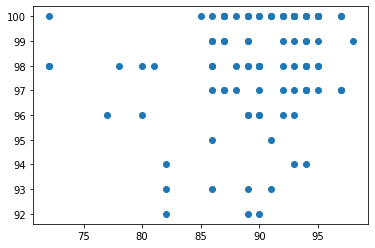

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_score.audience_score,df_score.critic_score)

### 2. Downloading Files from the Internet
   * __HTTP, the Hypertext Transfer Protocol__, is the language that web browsers (like Chrome or Safari) and web servers (basically computers where the contents of a website are stored) use to speak to each other. 
   * __Text File__ A file that uses specific character set where lines of text are separated by newline characters and contains no formatting or media
   * Using OS libary to dewonald file and store in another file
       * Import Requests
       ```Python
        import requests
        import os
       ```
       * Create a Folder
       ```Python
        # Make directory if it doesn't already exist
        folder_name = 'new_folder'
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
       ```
       * Create the Request
        ```Python
        url = 'https://data-source.com'
        response = requests.get(url)
       ```
       * Access the Content and Write to a File
       ```Python
        with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
            file.write(response.content)
       ```    
   

In [6]:
import requests
import os

In [7]:
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [9]:
# Implement the code in the video above in a for loop for all Ebert reviews
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

   ####  Opening and Reading From Files and store in a pandas DataFrame
   * os listdir libray
   * __glob__ libray
       * import glob
       ```Python
       import glob
       ```
       * To return a list of pathnames that match a partial pathname use glob.glob:
       ```Python
       glob.glob(pathname_to_match)
       ```
       * loop through the items in the ebert_reviews folder using the * wildcard character to represent the filenames
       ```Python
       for ebert_review in glob.glob('ebert_reviews/*.txt'):
           print(ebert_review)
       ```
   * __Always Use Encoding!__: In Python 3, when opening text to read, you should always use open with an encoding parameter to ensure you get correctly decoded Unicode, or an error message.
       * ```Python open(filename, encoding='utf-8')```

In [10]:
import pandas as pd
import os
import glob

In [20]:
# folder = 'ebert_reviews'
# for ebert_review in os.listdir(folder):
#     with open (os.path.join(folder, ebert_review ), encoding='utf-8') as file:
#         title = file.readline()[:-1]
#         print(title)
#         break

1-the-wizard-of-oz-1939-film.txt


In [28]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'ebert_reviews'
for ebert_review in os.listdir(folder):
    ranking = ebert_review.split('-')[0]
    with open(os.path.join(folder, ebert_review), encoding='utf-8') as file:
        title = file.readline()[:-1]      
        # Your code here
        review_url = file.readline()[:-1]
        review_text = file.read()

        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'review_url': review_url,
                        'review_text': review_text})
df__ebert_review = pd.DataFrame(df_list, columns = ['ranking','title', 'review_url', 'review_text'])
df__ebert_review.sort_values('ranking')

,ranking,title,review_url,review_text
0,1,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
11,2,Citizen Kane (1941),http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
20,3,The Third Man (1949),http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...
31,4,Get Out (2017),http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ..."
41,5,Mad Max: Fury Road (2015),http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...
...,...,...,...,...
84,96,Man on Wire (2008),http://www.rogerebert.com/reviews/man-on-wire-...,I am afraid of heights. Now you know. That is ...
85,97,Jaws (1975),http://www.rogerebert.com/reviews/great-movie-...,"""You're going to need a bigger boat.""\n\nSo th..."
86,98,Toy Story (1995),http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple..."
87,99,"The Godfather, Part II (1974)",http://www.rogerebert.com/reviews/great-movie-...,The musical score plays an even greater role i...


### 3. APIs (Application Programming Interfaces)
   * We could scrape the image URL from the HTML, but a better way is using API
   * The __Rotten Tomatoes API__ and does provide audience scores (better way than web scraping), but equires you to apply for access before using it and doesn't provide images
   ```Python
    import rtsimple as rt
    rt.API_Key = 'YOUR API KEY HERE'
    movie = rt.Movies('10489')
    movie.ratings['audience_score']
   ```
   * Scraping is brittle and breaks with web layout redesigns because the underlying HTML has changed.
   * instead, we could use __"MediaWiki API"__
   * __wptools Library__, one of python libraries for MediaWiki
       * get a page object
       ```Python
       page = wptools.page('Mahatma_Gandhi')
       ```
       * Simply calling get() on a page will automagically fetch extracts, images, infobox data, wikidata, and other metadata via the MediaWiki, Wikidata, and RESTBase APIs.
       ```Python
       page.get()
       ```
   * Most data from APIs comes in JSON or XML format
       * __JSON__:Javascript Object Notation
       * __XML__:Extensible Markup Language

In [29]:
import wptools
page = wptools.page('12_Angry_Men_(1957_film)').get()

en.wikipedia.org (query) 12_Angry_Men_(1957_film)
en.wikipedia.org (parse) 92605
www.wikidata.org (wikidata) Q2345
www.wikidata.org (labels) P3808|Q27847754|P9584|P2346|P2758|P2130...
www.wikidata.org (labels) P921|P3129|P1981|P2638|P3844|P2509|Q416...
www.wikidata.org (labels) P144|Q960873|P2047|P1237|P7222|P5099|Q9...
www.wikidata.org (labels) P2603|Q21209409|P3302|P3145|P856|P4515|...
en.wikipedia.org (restbase) /page/summary/12_Angry_Men_(1957_film)
en.wikipedia.org (imageinfo) File:12 Angry Men (1957 film poster).jpg
12 Angry Men (1957 film) (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(1)> Twelve Angry Men
  assessments: <dict(5)> United States, Law, New York City, Film, ...
  claims: <dict(118)> P1476, P166, P1258, P495, P1040, P144, P1265...
  description: 1957 American film by Sidney Lumet
  exhtml: <str(452)> <p><i><b>12 Angry Men</b></i> is a 1957 Ameri...
  exrest: <str(431)> 12 Angry Men is a 1957 American courtroom dra...
  extext: <str(1525)> _**12 Angry Me

In [30]:
page.data['title']

'12_Angry_Men_(1957_film)'

In [31]:
page.data['image']

[{'kind': 'query-pageimage',
  'file': 'File:12 Angry Men (1957 film poster).jpg',
  'orig': '12_Angry_Men_(1957_film_poster).jpg',
  'timestamp': '2020-01-08T08:40:10Z',
  'size': 1505621,
  'width': 1902,
  'height': 2907,
  'url': 'https://upload.wikimedia.org/wikipedia/commons/b/b5/12_Angry_Men_%281957_film_poster%29.jpg',
  'descriptionurl': 'https://commons.wikimedia.org/wiki/File:12_Angry_Men_(1957_film_poster).jpg',
  'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=85718046',
  'title': 'File:12 Angry Men (1957 film poster).jpg',
  'metadata': {'DateTime': {'value': '2020-01-08 08:40:10',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'ObjectName': {'value': '12 Angry Men (1957 film poster)',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'CommonsMetadataExtension': {'value': 1.2,
    'source': 'extension',
    'hidden': ''},
   'Categories': {'value': '12 Angry Men (1957 film)|Film posters of the United States, 1957|PD-Art (PD-US-n

In [32]:
import pandas as pd
import wptools
import os
import requests
from PIL import Image
from io import BytesIO

In [33]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [39]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [40]:
df_list = []
image_errors = {}
for title in title_list:
    try:
        ranking = title_list.index(title) + 1
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = page.get().data['image']
        # First image is usually the poster
        first_image_url =images[0]['url']
        r = requests.get(first_image_url)
        image_file_format = first_image_url.split('.')[-1]
#         i = Image.open(BytesIO(r.content))
#         image_file_format = first_image_url.split('.')[-1]
#         i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        with open(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format, 'wb') as f:
            f.write(r.content)
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images
        

15_Boyhood_(film): 'image'


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29


In [41]:
for key in image_errors.keys():
    print(key)

15_Boyhood_(film)
22_A_Hard_Day%27s_Night_(film)
72_Rosemary%27s_Baby_(film)


In [42]:
# Inspect unidentifiable images and download them individually
for rank_title, images in image_errors.items():
    if rank_title == '15_Boyhood_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/a/a6/Boyhood_%282014%29.png'
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '772_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Mia_Farrow_-_Rosemary%27s_Baby.jpg/640px-Mia_Farrow_-_Rosemary%27s_Baby.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    with open(folder_name + "/" + rank_title + '.' + image_file_format, 'wb') as f:
        f.write(r.content)

In [47]:
df_image = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df_image = df_image.sort_values('ranking').reset_index(drop=True)
df_image

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
...,...,...,...
95,96,Man_on_Wire,https://upload.wikimedia.org/wikipedia/en/5/54...
96,97,Jaws_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
97,98,Toy_Story,https://upload.wikimedia.org/wikipedia/en/1/13...
98,99,The_Godfather_Part_II,https://upload.wikimedia.org/wikipedia/en/0/03...


In [48]:
df_image[df_image.duplicated()]

,ranking,title,poster_url


In [49]:
df_image.drop_duplicates()

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
...,...,...,...
95,96,Man_on_Wire,https://upload.wikimedia.org/wikipedia/en/5/54...
96,97,Jaws_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
97,98,Toy_Story,https://upload.wikimedia.org/wikipedia/en/1/13...
98,99,The_Godfather_Part_II,https://upload.wikimedia.org/wikipedia/en/0/03...


In [64]:
df_merge = pd.merge(df__ebert_review, df_image, on = 'ranking', how = 'left').drop('title_y', axis=1)
df_merge.rename(columns = {'title_x':'title'}, inplace = True)
df_merge= df_merge.sort_values('ranking')

In [65]:
df_merge

,ranking,title,review_url,review_text,poster_url
0,1,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...
11,2,Citizen Kane (1941),http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/commons...
20,3,The Third Man (1949),http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/commons...
31,4,Get Out (2017),http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ...",https://upload.wikimedia.org/wikipedia/en/a/a3...
41,5,Mad Max: Fury Road (2015),http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...,https://upload.wikimedia.org/wikipedia/en/6/6e...
...,...,...,...,...,...
84,96,Man on Wire (2008),http://www.rogerebert.com/reviews/man-on-wire-...,I am afraid of heights. Now you know. That is ...,https://upload.wikimedia.org/wikipedia/en/5/54...
85,97,Jaws (1975),http://www.rogerebert.com/reviews/great-movie-...,"""You're going to need a bigger boat.""\n\nSo th...",https://upload.wikimedia.org/wikipedia/en/e/eb...
86,98,Toy Story (1995),http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple...",https://upload.wikimedia.org/wikipedia/en/1/13...
87,99,"The Godfather, Part II (1974)",http://www.rogerebert.com/reviews/great-movie-...,The musical score plays an even greater role i...,https://upload.wikimedia.org/wikipedia/en/0/03...


In [66]:
df_merge.to_csv('merge.txt', index  = False)

In [74]:
import os

from os import path
from wordcloud import WordCloud

# Read the whole text.
with open('merge.txt', encoding='utf-8') as file:
    text = file.read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

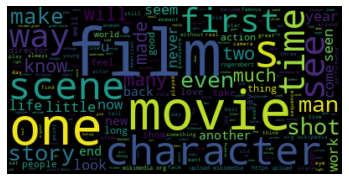

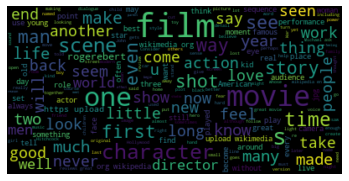

In [75]:

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS


# Read the whole text.
with open('merge.txt', encoding='utf-8') as file:
    text = file.read()

<Figure size 432x288 with 0 Axes>

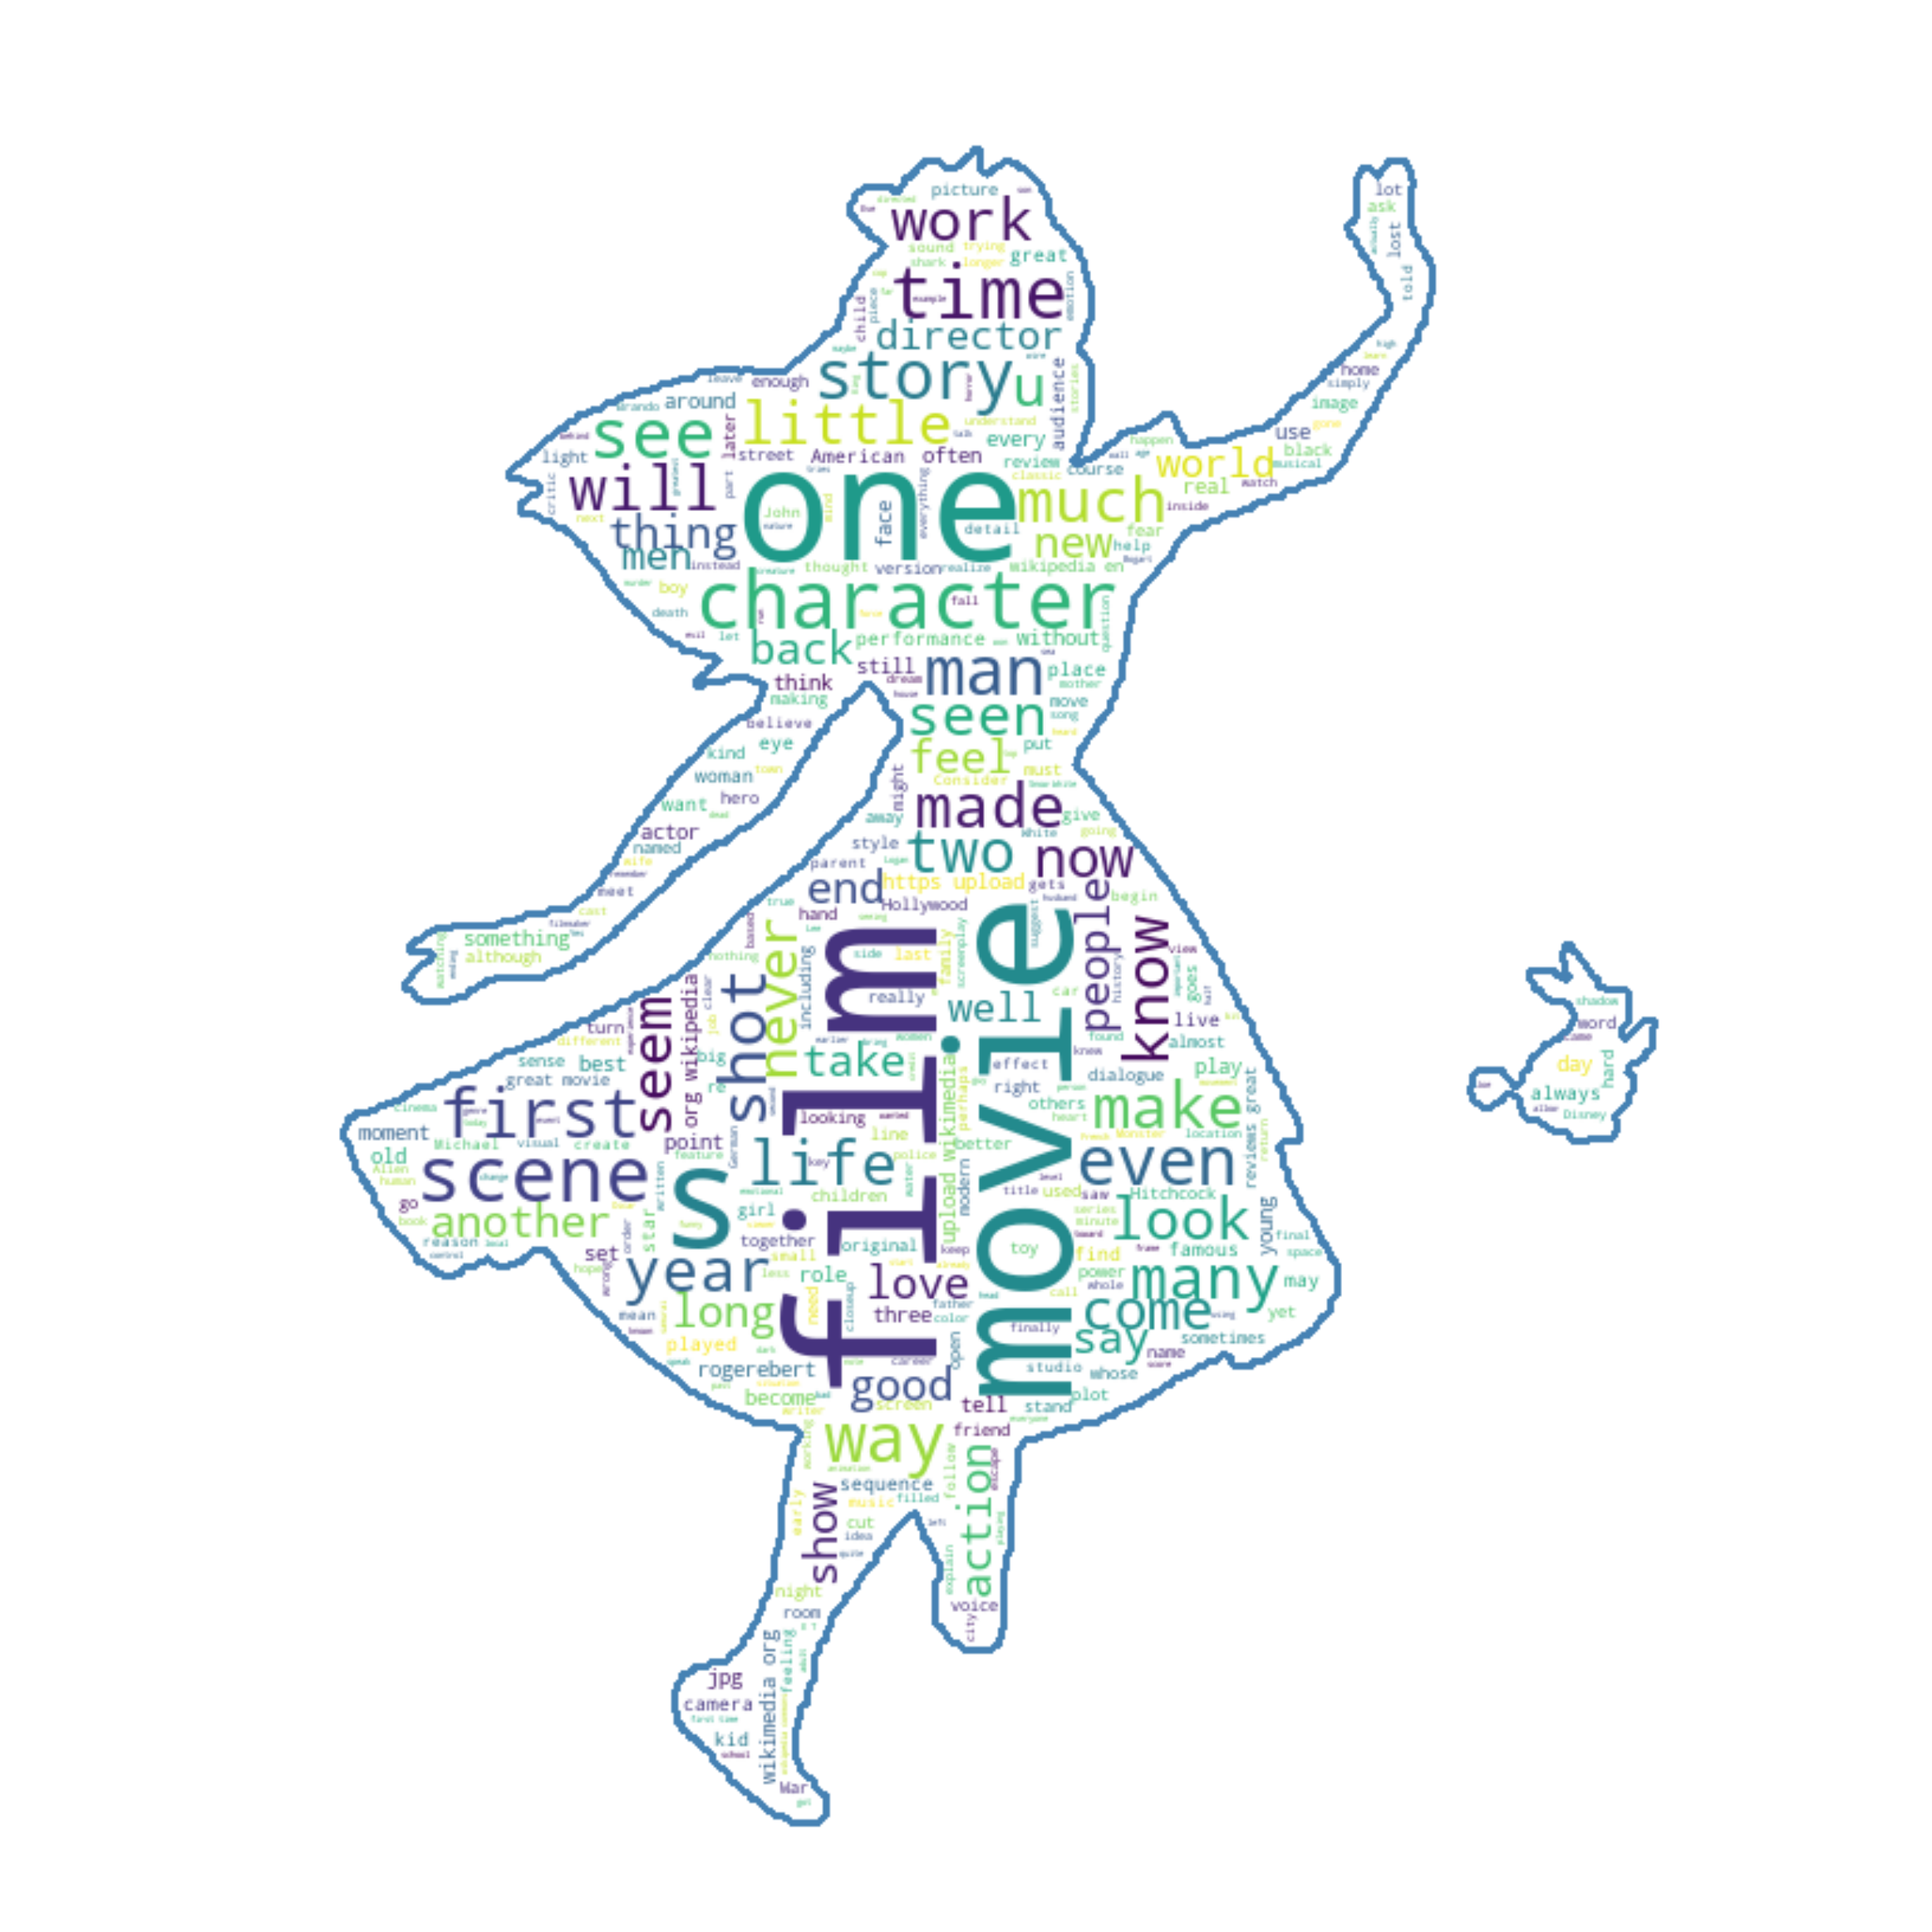

<Figure size 432x288 with 0 Axes>

In [84]:
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# # store to file
# wc.to_file(path.join(d, "alice.png"))
# show
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()